# Image preparation for Canvas transfer
### Resize images to fit your canvas size or ratio
### Draw grids to help sketch images on large canvases with ease

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Function - Drawing grid
Function defintion to draw a grid on an input image. User can specify the following.
* Grid size using grid_size = (rows, column) specifying the number of rows and columns.
* Color of gridlines in RGB format 
    * (255, 255, 255) for white
    * (0, 0, 0) for black
* Thicknes of the grid lines using thickenss = pixel_size. 

In [2]:
# grid size is the number of rows and columns, if grid_size=(4, 8), grid of 4 rows and 8 columns is drawn

def draw_grid(img_grid, grid_size = (8, 8), color = (0, 0, 0), thickness = 2):
    
    for i in range(1, grid_size[1]):
        img_grid = cv2.line(img_grid, (i * int(img_grid.shape[1]/grid_size[1]), 0), 
                            (i * int(img_grid.shape[1]/grid_size[1]), img_grid.shape[0]), color, thickness)
    for j in range(1, grid_size[0]):  
        img_grid = cv2.line(img_grid, (0, j * int(img_grid.shape[0]/grid_size[0])), 
                            (img_grid.shape[1], j * int(img_grid.shape[0]/grid_size[0])), color, thickness)
    return img_grid

## Function - Changing aspect ratio
User can specifying the following.
* flag = True or False
  * True to change the image aspect ratio to a specific height to width ratio. Set ratio_h and ratio_w to desired values.
  * False to change aspect ratio to a specific pixel size. Set size = (width, height)

In [3]:
#flag = True for aspect ratio with ratio_h and ratio_w
#flag = False for absolute pixels with size = (width, height)

def aspect_ratio_change(img_resize, ratio_h=3, ratio_w=4, size = (4800, 3600), flag = True):
    print("Size before resize: ", img_resize.shape)
    if (flag == True):
        width1 = img_resize.shape[1]
        height1 = int(ratio_h * (img_resize.shape[1]/ratio_w))
        height2 = img_resize.shape[0]
        width2 = int(ratio_w * (img_resize.shape[0]/ratio_h))
    
        if (abs(width1-width2) < abs(height1-height2)):
            dim = (width2, height2)
        
        else: 
            dim = (width1, height1)
    if (flag == False):
        dim = size
        
    img_resize = cv2.resize(img_resize, dim, interpolation = cv2.INTER_AREA)
    print("Size after resize: ", img_resize.shape)
    
    return img_resize

## Read and Display image
Set img_name to the name of jpg image stored in the Images folder

In [4]:
img_name = "apple"
img_path = "Images/" + img_name + ".jpg"
img_grid_path = "Images/" + img_name + "_grid.jpg"
img_resize_ratio_path = "Images/" + img_name + "_resize_ratio.jpg"
img_resize_size_path = "Images/" + img_name + "_resize_size.jpg"

img_color = cv2.imread(img_path)
print(img_color.shape)

(4928, 3264, 3)


Text(0.5, 1.0, 'Gray Image')

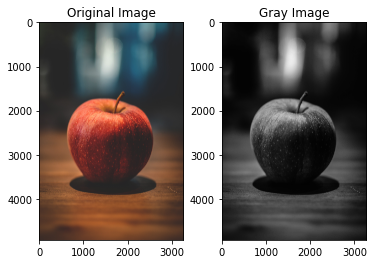

In [5]:
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Image')

## Drawing grid - Specific rows and columns

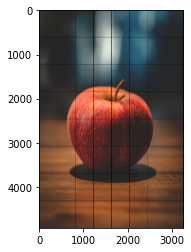

In [6]:
img_grid = draw_grid(img_color.copy(), grid_size = (8, 8), color = (0, 0, 0), thickness = 4)
plt.imshow(cv2.cvtColor(img_grid, cv2.COLOR_BGR2RGB))

## Save the image with grid

In [7]:
cv2.imwrite(img_grid_path,img_grid)
#cv2.imwrite("Images/" + img_name + "_grid2.jpg",img_grid)

True

## Image Resize - with specific aspect ratio

In [8]:
img_resize_ratio = aspect_ratio_change(img_color.copy(), ratio_h=3, ratio_w=4, flag=True)

Size before resize:  (4928, 3264, 3)
Size after resize:  (2448, 3264, 3)


In [9]:
img_resize_size = aspect_ratio_change(img_color.copy(), size=(4800, 3600), flag=False)

Size before resize:  (4928, 3264, 3)
Size after resize:  (3600, 4800, 3)


Text(0.5, 1.0, 'Resized Image - Size')

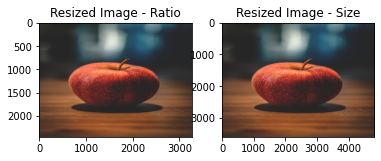

In [10]:
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_resize_ratio, cv2.COLOR_BGR2RGB))
plt.title('Resized Image - Ratio')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_resize_size, cv2.COLOR_BGR2RGB))
plt.title('Resized Image - Size')

In [11]:
cv2.imwrite(img_resize_ratio_path, img_resize_ratio)
cv2.imwrite(img_resize_size_path, img_resize_size)

True